Plot data generated by fig4-simulations.ipynb.

Created on: 04/05/21

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ast
import numpy as np


init_sign=1.0


,Unnamed: 0,block,beta_factor,gradient,mag,background_field
0,0,0,8.0,-10.0,0.948136,3.577236
1,1,1,8.0,-10.0,0.815369,1.869919
2,2,2,8.0,-10.0,0.660114,0.975610
3,3,3,8.0,-10.0,-0.866397,-6.422764
4,4,4,8.0,-10.0,0.929900,3.577236
...,...,...,...,...,...,...
247,7,7,8.0,10.0,0.997363,6.422764
248,8,8,8.0,10.0,-0.279863,-3.577236
249,9,9,8.0,10.0,0.243099,-1.869919
250,10,10,8.0,10.0,0.426350,-0.975610


(array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ]),
 <a list of 9 Text yticklabel objects>)

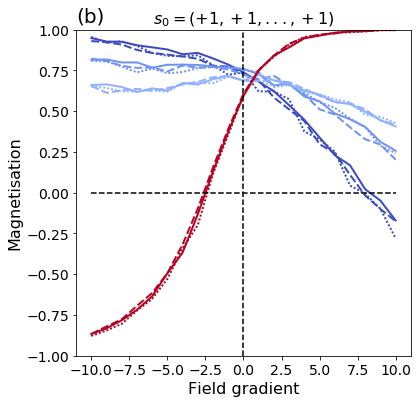

In [24]:

for init_sign in [1.0,-1.0] :


    df=pd.read_csv(f"Data/block_magnetisations_{init_sign}".replace('.','-') +".csv")
    block_data = pd.read_csv('Data/block_info.csv',converters={'Block' : ast.literal_eval}).rename(columns={'Unnamed: 0':'block'})
    df=df.merge(block_data,on='block',how='left')

    df['region']=df['block_name'].apply(lambda x : x.split('_')[0])
    df=df.rename(columns={'average_age':'Mean Age','region':'Region'})

    grad_vals =  np.arange(-10.0,11.0,1.0)


    fig,ax=plt.subplots(figsize=(6,6))
    #sns.scatterplot(data=df,x='gradient',y='mag',hue='average_age',palette='tab20',style='region')
    sns.lineplot(data=df,x='gradient',y='mag',hue='Mean Age',palette='coolwarm',style='Region',lw=2.0)

    plt.plot(grad_vals,np.zeros(len(grad_vals)),'k--')
    plt.plot([0.0,0.0],[-1,1],'k--')


    plt.ylim(-1,1)
    if init_sign==-1.0:
        plt.legend(ncol=2,loc='upper left',fontsize=14)
        plt.title("$s_0=(-1,-1,...,-1)$",fontsize=16)
        plt.text(-11,1.05,"(a)",fontsize=20)
    elif init_sign==1.0:
        plt.legend([],[], frameon=False)
        plt.title("$s_0=(+1,+1,...,+1)$",fontsize=16)
        plt.text(-11,1.05,"(b)",fontsize=20)

    plt.xlabel("Field gradient",fontsize=16)
    plt.ylabel("Magnetisation",fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # plt.savefig(f"Plots/Pokec_block_mags_{init_sign}_beta_2".replace('.','-')+".jpg",bbox_inches='tight')